# UTN FRBA 
## Ciencia de Datos - Ingeniería Industrial
### Examen Practico 14 noviembre 2020

### Nombre Apellido y Legajo

In [1]:
### JUAN IGNACIO DEMAESTRI
### juanignaciodemaestri@gmail.com
### 144321-5

### Importamos algunas librerias. Puede ser que falten algunas y tengas que importarlas vos mas adelante.

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### El dataset esta pre-cargado. Con solo correr esta celda se cargará la matriz de sample-features en la variable "x" y sus respectivas etiquetas/labels en la variable "y".

In [3]:
boston = load_boston()
boston.data.shape
x = boston.data
y = boston.target

### Ejercicio 01:
- Al dataset original de samples "x" transformarlo/pre-preprocesarlo con "StandardScaler" de manera tal que las features tengan media = 0 y desvio standard = 1. Al dataset transformado guardarlo en una variable llamada "xscal".
- Con "xscal" realizar un PCA con 2 componentes sobre la matrix "x" y obtener una matriz "xpca". Es decir que "xpca" tendra las nuevas features (componentes principales) obtenidas por el PCA. 
- Con las dos componentes principales del PCA que se encuentran en la matriz "xpca" realizar un scatter plot para visualizar el dataset.

In [38]:
boston.data.shape

(506, 13)

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler()

In [13]:
xscal = scaler.transform(x)

In [14]:
xscal.shape

(506, 13)

In [16]:
import pandas as pd
n_comps = 2
pca = PCA(n_components = n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xscal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_


In [17]:
xpca.shape

(506, 2)

In [91]:
xpca

,0,1
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712
...,...,...
501,-0.314968,0.724284
502,-0.110513,0.759308
503,-0.312360,1.155246
504,-0.270519,1.041362


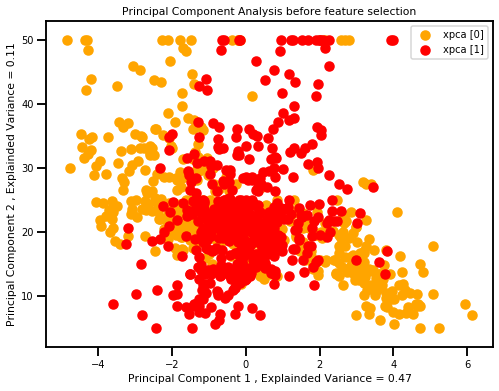

In [102]:
import seaborn as sns

sns.set_context("talk", font_scale=0.6)
plt.figure(figsize=(8,6))
plt.scatter(xpca[0], y,color="orange", label="xpca [0]")
plt.scatter(xpca[1], y,color="r", label="xpca [1]")
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

Utilizando la matriz "xscal" dividir en train y test. Realizar una regresion lineal para predecir la variable continua "y". Para simplificar, durante el entrenamiento de la regresion no es necesario aplicar gridsearchCV ni cross validation, solamente "fitear" el modelo de regresion a los datos de train y predecir en test. Calcular el error cuadrático medio RMSE para los datos de test (seguramente tengas que importar algunas librerias).

In [21]:
xtrain_scal, xtest_scal, ytrain, ytest = train_test_split(xscal, y, test_size=0.90, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
import math


In [24]:
lr = LinearRegression()


In [25]:
lr.fit(xtrain_scal, ytrain)


LinearRegression()

In [26]:
ypred = lr.predict(xtest_scal)

In [31]:
#MSE
mse = mean_squared_error(ytest, ypred)
mse

28.01412571526933

In [33]:
#RMSE
rmse = math.sqrt(mse)
rmse

5.292837208461009

In [34]:
results = pd.DataFrame(columns=['Model','MSE','RMSE'])


In [36]:
results_juan = results.append({'Model':'Linear Regression',
                                'MSE':mse,
                                'RMSE':rmse},ignore_index=True)

In [37]:
results_juan

,Model,MSE,RMSE
0,Linear Regression,28.014126,5.292837
